Run this cell to import needed libraries

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point, LineString, box, MultiPolygon, Polygon
import requests
import os
import pandas as pd
from matplotlib.patches import FancyArrowPatch
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.io.shapereader import Reader
from geopy.distance import geodesic, great_circle
import numpy as np
from shapely.ops import unary_union
from scipy.spatial import distance
from skimage.graph import route_through_array
from scipy.ndimage import distance_transform_edt
import networkx as nx
from shapely.ops import nearest_points

Run this cell to create the list of places with the lat and lon

In [2]:
places = pd.read_csv('place_202407091342.csv')[['place_name', 'lat', 'lon']].dropna()
pl = {}
for _, row in places.iterrows():
    pl[row['place_name']] = (row['lat'], row['lon'])

Run this cell to see the places we have in the database (sorted alphabetically)

In [3]:
k = sorted(list(pl.keys()))
k

['A Coruña',
 'Abbeville',
 'Acadie',
 'Alençon',
 'Ambon',
 'Amiens',
 'Angers',
 'Anjouan',
 'Archiac',
 'Argol',
 'Arradon',
 'Artenay',
 'Arzano',
 'Arzon',
 'Ascension Island',
 'Aucaleuc',
 'Augan',
 'Auray',
 'Avranches',
 'Baden',
 'Baguer-Morvan',
 'Bangor',
 'Barcelona',
 'Barick Apantud,\nAngleterre',
 'Barneville-Carteret',
 'Baud',
 'Bayeux',
 'Baía de Todos os Santos',
 'Belle Île',
 'Belz St-Cado',
 'Bengaluru',
 'Berlin',
 'Berrien',
 'Beuzec',
 'Beuzec-Cap-Sizun',
 'Beuzec-Conq',
 'Bignan',
 'Bilbao',
 'Billiers',
 'Blaye',
 'Blois',
 'Boco',
 'Bordeaux',
 'Bors',
 'Bourbriac',
 'Bourg Briand, évêché\nde Tréguier',
 'Bourg-Charente',
 'Bourg-en-Bresse',
 'Bouzy',
 'Brech',
 'Brest',
 'Brive-la-Gaillarde',
 'Broons',
 'Brusvily',
 'Burgundy',
 'Bécherel',
 'Cadillac',
 'Camaret-sur-Mer',
 'Camors',
 'Canaries',
 'Cancale',
 'Cape of Good Hope',
 'Carantec',
 'Carentoir',
 'Carnet',
 'Castelferrus',
 'Castropol',
 'Caulnes',
 'Chandannagar',
 'Channai',
 'Charenton-le-Po

By changing the search_item in the cell below, you can make sure if the place exists in the database or not

In [12]:
search_item = 'sar e pol e fardis'
if search_item in k:
    print('This place exists in the database!')
else:
    print('This place does not exist in the database!')

This place does not exist in the database!


write the stops in order in the cell below to create the path

In [57]:
stops = [
    'Archiac',
    'Khājuri',
    'Madagascar',
    'Martinique',
    'Ireland'
        ]
coordinates = [pl[i] for i in stops]

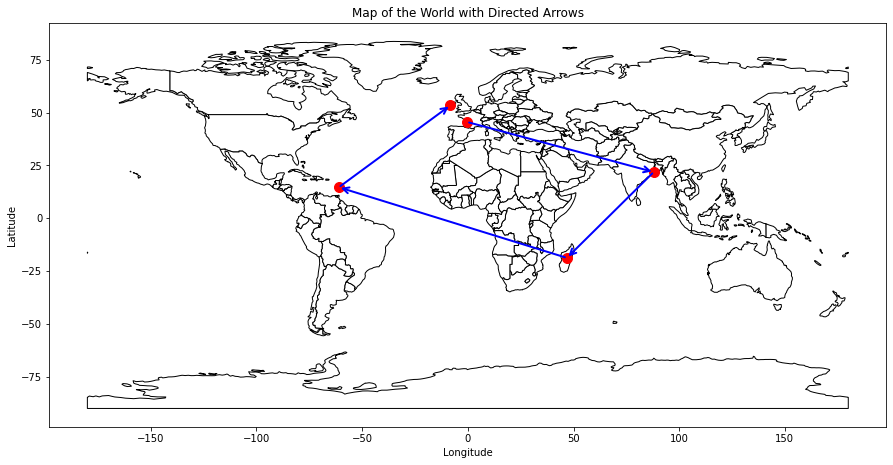

In [58]:
# Create GeoDataFrame with the points
gdf_points = gpd.GeoDataFrame(geometry=[Point(lon, lat) for lat, lon in coordinates])

# Create GeoDataFrame with the lines connecting the points in order
lines = [LineString([Point(coordinates[i]), Point(coordinates[i + 1])]) for i in range(len(coordinates) - 1)]
gdf_lines = gpd.GeoDataFrame(geometry=lines)

# Load the world map from the extracted shapefile
shapefile_path = os.path.join('natural_earth_vector', 'natural-earth-vector-5.0.1', 'geojson', 'ne_110m_admin_0_countries.geojson')
world = gpd.read_file(shapefile_path)

# Plot the world map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.plot(ax=ax, color='white', edgecolor='black')

# Plot the points
gdf_points.plot(ax=ax, color='red', marker='o', markersize=100)

# Plot the lines with arrows
for i in range(len(coordinates) - 1):
    point1 = coordinates[i]
    point2 = coordinates[i + 1]
    arrow = FancyArrowPatch((point1[1], point1[0]), (point2[1], point2[0]), color='blue', linewidth=2, arrowstyle='->', mutation_scale=15)
    ax.add_patch(arrow)

# Set plot title and show plot
plt.title('Map of the World with Directed Arrows')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

run this cell to see a better view

/usr/local/lib/python3.9/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


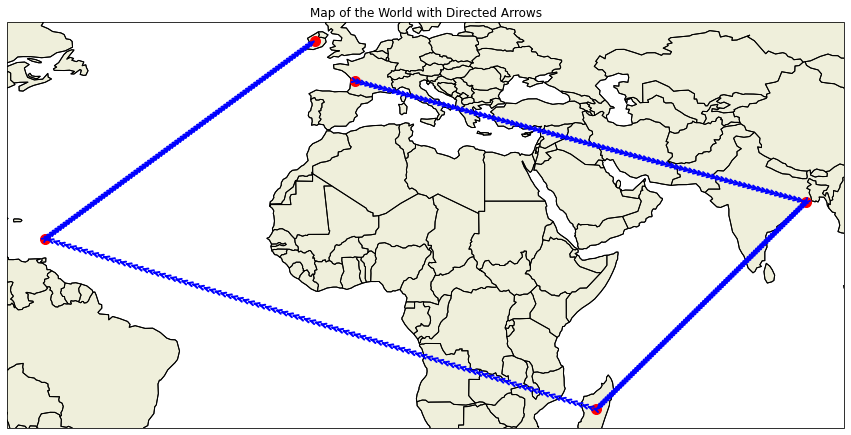

In [59]:
# Function to generate intermediate points on a great circle route
def interpolate_points(start, end, num_points=100):
    lats = np.linspace(start[1], end[1], num_points)
    lons = np.linspace(start[0], end[0], num_points)
    return list(zip(lons, lats))

# Plot the world map using cartopy
fig = plt.figure(figsize=(15, 10))
ax = plt.axes(projection=ccrs.PlateCarree())

# Add the land feature
ax.add_feature(cfeature.LAND, edgecolor='black')

# Add the shapefile for better country borders
shape_feature = cfeature.ShapelyFeature(Reader(shapefile_path).geometries(), ccrs.PlateCarree(), edgecolor='black')
ax.add_feature(shape_feature, facecolor='none')

# Plot the points
for lat, lon in coordinates:
    ax.plot(lon, lat, 'ro', markersize=10, transform=ccrs.PlateCarree())

# Plot the great circle routes with arrowheads
for i in range(len(coordinates) - 1):
    route_points = interpolate_points(coordinates[i], coordinates[i + 1])
    for j in range(len(route_points) - 1):
        ax.annotate('', xy=(route_points[j+1][1], route_points[j+1][0]), xytext=(route_points[j][1], route_points[j][0]),
                    arrowprops=dict(arrowstyle='->', color='blue', lw=2, mutation_scale=10),
                    transform=ccrs.Geodetic())

# Set plot title and show plot
plt.title('Map of the World with Directed Arrows')
plt.show()